In [45]:
import numpy as np
import HindiCharts as hc
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as mfm
import MatplotlibKeyMap as mk

In [46]:
sentences = []
df_words = pd.DataFrame(columns=['word', 'frequency'])
df_monograms = pd.DataFrame(columns=['monogram', 'frequency'])
df_digrams = pd.DataFrame(columns=['digram', 'frequency'])
df_triagrams = pd.DataFrame(columns=['triagram', 'frequency'])
df_endings = pd.DataFrame(columns=['ending', 'frequency'])
df_vyanjan = pd.DataFrame(columns=['vyanjan', 'frequency'])
df_matra = pd.DataFrame(columns=['matra', 'frequency'])
df_halfLetters = pd.DataFrame(columns=['halfLetter', 'frequency'])
df_swar = pd.DataFrame(columns=['swar', 'frequency'])

In [47]:
print(hc.vyanjans)

['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह']


In [48]:
vyanjanCol = np.array(hc.vyanjans)
vyanjanFreq = np.zeros(len(vyanjanCol), dtype=float)

df_vyanjan['vyanjan'] = vyanjanCol
df_vyanjan['frequency'] = vyanjanFreq

print(df_vyanjan)

   vyanjan  frequency
0        क    0.00000
1        ख    0.00000
2        ग    0.00000
3        घ    0.00000
4        ङ    0.00000
5        च    0.00000
6        छ    0.00000
7        ज    0.00000
8        झ    0.00000
9        ञ    0.00000
10       ट    0.00000
11       ठ    0.00000
12       ड    0.00000
13       ढ    0.00000
14       ण    0.00000
15       त    0.00000
16       थ    0.00000
17       द    0.00000
18       ध    0.00000
19       न    0.00000
20       प    0.00000
21       फ    0.00000
22       ब    0.00000
23       भ    0.00000
24       म    0.00000
25       य    0.00000
26       र    0.00000
27       ल    0.00000
28       व    0.00000
29       श    0.00000
30       ष    0.00000
31       स    0.00000
32       ह    0.00000


In [49]:
matraCol = np.array(hc.matras)
matraFreq = np.zeros(len(matraCol), dtype=float)

df_matra['matra'] = matraCol
df_matra['frequency'] = matraFreq

print(df_matra)



   matra  frequency
0      ा    0.00000
1      ि    0.00000
2      ी    0.00000
3      ु    0.00000
4      ू    0.00000
5      े    0.00000
6      ै    0.00000
7      ो    0.00000
8      ौ    0.00000
9      ं    0.00000
10     ः    0.00000
11     ँ    0.00000
12     ृ    0.00000


In [50]:
swarCol=np.array(hc.swars)
swarFreq=np.zeros(len(swarCol), dtype=float)

df_swar['swar']=swarCol
df_swar['frequency']=swarFreq

print(df_swar)

   swar  frequency
0     अ    0.00000
1     आ    0.00000
2     इ    0.00000
3     ई    0.00000
4     उ    0.00000
5     ऊ    0.00000
6     ए    0.00000
7     ऐ    0.00000
8     ओ    0.00000
9     औ    0.00000
10   अं    0.00000
11   अः    0.00000


In [51]:
def InsertOrIncrease(df, type,word):
    if df[type].isin([word]).any():
        df.loc[df[type] == word, 'frequency'] += 1
    else:
        df.loc[len(df)] = [word, 1]

In [52]:
def generateCSV(df, name):
    df['frequency']=df['frequency']*100 / df['frequency'].sum()
    pd.options.display.float_format = '{:.5f}'.format

    df.to_csv(name, index=False)

In [53]:
with open('input.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        for i in range(len(word)):
            df_vyanjan.loc[df_vyanjan['vyanjan'] == word[i], 'frequency'] += 1
            df_matra.loc[df_matra['matra'] == word[i], 'frequency'] += 1
            df_swar.loc[df_swar['swar'] == word[i], 'frequency'] += 1
            if(word[i]=='्'):
                # print(f'Half letter {word[i-1]}{word[i]} detected in {word}')
                InsertOrIncrease(df_halfLetters, 'halfLetter',word[i-1]+word[i])
            
            
                            
        if len(word) ==1:
            InsertOrIncrease(df_monograms, 'monogram',word)
        
        if len(word) ==2:
            InsertOrIncrease(df_digrams, 'digram',word) 
            
        if len(word) ==3:
            InsertOrIncrease(df_triagrams, 'triagram',word)
        
        if word[-1]=='।':
            InsertOrIncrease(df_endings, 'ending',word[:-1])
        
        
generateCSV(df_vyanjan, 'vyanjan.csv')

generateCSV(df_matra, 'matra.csv')

generateCSV(df_monograms, 'monograms.csv')

generateCSV(df_digrams, 'digrams.csv')

generateCSV(df_triagrams, 'triagrams.csv')

generateCSV(df_endings, 'endings.csv')

generateCSV(df_halfLetters, 'halfLetters.csv')

generateCSV(df_swar, 'swar.csv')

print(df_swar)



Number of words: 4702
   swar  frequency
0     अ   15.96958
1     आ   10.39290
2     इ    8.23828
3     ई    4.94297
4     उ   22.43346
5     ऊ    1.77440
6     ए   18.63118
7     ऐ    1.01394
8     ओ    1.14068
9     औ   15.46261
10   अं    0.00000
11   अः    0.00000


In [54]:
def PlotBarGraph(df, name):
    plt.figure()
    arr=df[name].copy()
    ax=plt.axes()
    # print(arr)
    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]
    # print(arr)
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)

    sns.barplot(x=arr, y=df['frequency'])
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15)

    plt.savefig(name+'.png')

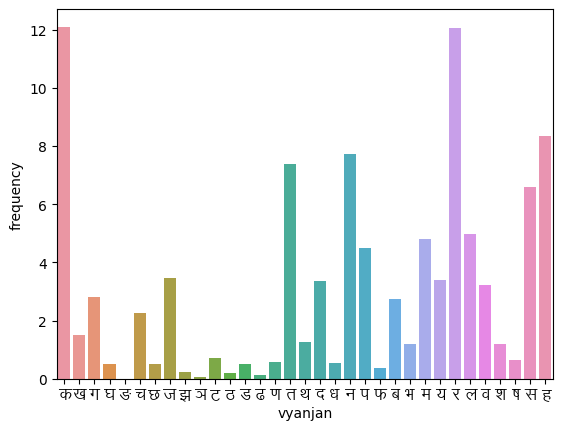

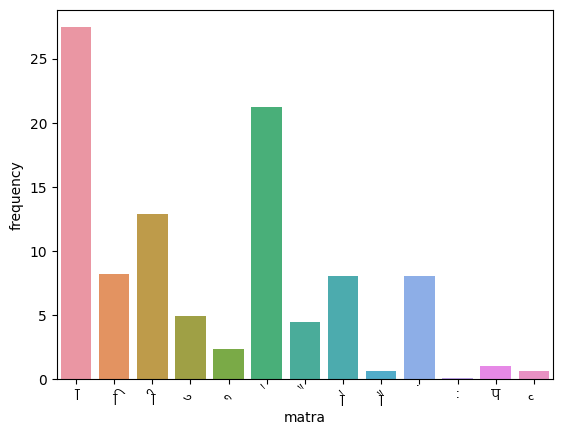

In [55]:
PlotBarGraph(df_vyanjan, 'vyanjan')
PlotBarGraph(df_matra, 'matra')


In [56]:
print(f'Number of vyanjans: {len(hc.vyanjans)}')
print(f'Number of matras: {len(hc.matras)}')

Number of vyanjans: 33
Number of matras: 13


In [57]:
SubstitutionMatrixVyanjan = {
    'क': 'घ', 'ख': 'घ', 'ग': 'च', 'घ': 'छ', 'ङ': 'ज', 
    'च': 'झ', 'छ': 'ञ', 'ज': 'ट', 'झ': 'ठ', 'ञ': 'ड', 
    'ट': 'ढ', 'ठ': 'ण', 'ड': 'त', 'ढ': 'थ', 'ण': 'द', 
    'त': 'ध', 'थ': 'न', 'द': 'प', 'ध': 'फ', 'न': 'ब', 
    'प': 'भ', 'फ': 'म', 'ब': 'य', 'भ': 'र', 'म': 'ल', 
    'य': 'व', 'र': 'श', 'ल': 'ष', 'व': 'स', 
    'श': 'ह', 'ष': 'क', 'स': 'ख', 'ह': 'ग'
}

SubstitutionMatrixSwar = {
    'अ': 'ई', 'आ': 'उ', 'इ': 'ऊ', 'ई': 'ए', 'उ': 'ऐ', 'ऊ': 'ओ', 'ए': 'औ', 'ऐ': 'अ', 'ओ': 'आ', 'औ': 'इ',
}

SubstitutionMatrixMatra = {
    'ा': 'ी', 'ि': 'ु', 'ी': 'ू', 'ु': 'े', 'ू': 'ै', 'े': 'ो', 'ै': 'ौ', 'ो': 'ा', 'ौ': 'ि'
}


In [58]:
CipherText= []
PlainText = []

with open('PlainTextinput.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        PlainText.append(word)
        ogword = word

        for i in range(len(word)):
            if word[i] in SubstitutionMatrixVyanjan:
                word = word.replace(word[i], SubstitutionMatrixVyanjan[word[i]])
            if word[i] in SubstitutionMatrixMatra:
                word = word.replace(word[i], SubstitutionMatrixMatra[word[i]])
            if word[i] in SubstitutionMatrixSwar:
                word = word.replace(word[i], SubstitutionMatrixSwar[word[i]])
        print(f'{ogword} -> {word}')
        CipherText.append(word)

print(PlainText)
print(CipherText)


Number of words: 14
उस -> ऐख
टापू -> ढीभै
की -> घू
राजकुमारी -> हैटघेलैहै
विजेता -> सुटोधी
चन्द्रसेन -> झय्प्शखोय
को -> घा
उस -> ऐख
टापू -> ढीभै
का -> घी
राजा -> शूटू
घोषित -> छाकुध
करती -> घशधू
हैं। -> गौं।
['उस', 'टापू', 'की', 'राजकुमारी', 'विजेता', 'चन्द्रसेन', 'को', 'उस', 'टापू', 'का', 'राजा', 'घोषित', 'करती', 'हैं।']
['ऐख', 'ढीभै', 'घू', 'हैटघेलैहै', 'सुटोधी', 'झय्प्शखोय', 'घा', 'ऐख', 'ढीभै', 'घी', 'शूटू', 'छाकुध', 'घशधू', 'गौं।']


In [59]:
attempt = []

for i in range(len(PlainText)):
    str=""
    for j in range(len(PlainText[i])):
        # print(f'{PlainText[i][j]} is {hc.LetterType[PlainText[i][j]]}')
        str=str+hc.LetterType[PlainText[i][j]][0]
    attempt.append(str)

print(attempt)


        

['sv', 'vmvm', 'vm', 'vmvvmvmvm', 'vmvmvm', 'vvhvhvvmv', 'vm', 'sv', 'vmvm', 'vm', 'vmvm', 'vmvmv', 'vvvm', 'vmmv']


In [60]:
df_Cvyanjan = pd.DataFrame(columns=['vyanjan', 'frequency'])
df_Cswar = pd.DataFrame(columns=['swar', 'frequency'])
df_Cmatra = pd.DataFrame(columns=['matra', 'frequency'])

for i in range(len(CipherText)):
    for letter in CipherText[i]:
        if letter in hc.vyanjans:
            InsertOrIncrease(df_Cvyanjan, 'vyanjan',letter)
        if letter in hc.swars:
            InsertOrIncrease(df_Cswar, 'swar',letter)
        if letter in hc.matras:
            InsertOrIncrease(df_Cmatra, 'matra',letter)
            
generateCSV(df_Cvyanjan, 'Cvyanjan.csv')
generateCSV(df_Cswar, 'Cswar.csv')
generateCSV(df_Cmatra, 'Cmatra.csv')

In [61]:
attemptedDecryption = []

for word in CipherText:
    attemptedDecryption.append(word)
    
print(attemptedDecryption)

for i in range(len(attemptedDecryption)):
    print(f'{PlainText[i]} -> {attemptedDecryption[i]}')

['ऐख', 'ढीभै', 'घू', 'हैटघेलैहै', 'सुटोधी', 'झय्प्शखोय', 'घा', 'ऐख', 'ढीभै', 'घी', 'शूटू', 'छाकुध', 'घशधू', 'गौं।']
उस -> ऐख
टापू -> ढीभै
की -> घू
राजकुमारी -> हैटघेलैहै
विजेता -> सुटोधी
चन्द्रसेन -> झय्प्शखोय
को -> घा
उस -> ऐख
टापू -> ढीभै
का -> घी
राजा -> शूटू
घोषित -> छाकुध
करती -> घशधू
हैं। -> गौं।


In [62]:
df_matra = df_matra.sort_values(by=['frequency'], ascending=False)
df_Cmatra = df_Cmatra.sort_values(by=['frequency'], ascending=False)

for word in CipherText:
    for i in range(len(word)):
        if word[i] in df_Cmatra['matra'].values:
            word = word.replace(word[i], df_matra['matra'].values[df_Cmatra['matra'].values.tolist().index(word[i])])
    print(word)

ऐख
ढेभा
घी
हूटघुलूहू
सिटोधे
झय्प्शखोय
घं
ऐख
ढेभा
घे
शेटे
छंकिध
घशधी
गैू।


In [63]:
print(PlainText)

['उस', 'टापू', 'की', 'राजकुमारी', 'विजेता', 'चन्द्रसेन', 'को', 'उस', 'टापू', 'का', 'राजा', 'घोषित', 'करती', 'हैं।']


In [64]:
def generateVyanjanKeyMatrix ():
    arr = np.random.permutation(33)

    dict = {}
    idx = 1
    for i in arr:
        dict[hc.IndexToVyanjan[idx].decode('utf-8')] = hc.IndexToVyanjan[i+1].decode('utf-8')
        
        idx = idx+1
    return dict

In [65]:
print(generateVyanjanKeyMatrix())

{'क': 'र', 'ख': 'ब', 'ग': 'थ', 'घ': 'स', 'ङ': 'ष', 'च': 'झ', 'छ': 'य', 'ज': 'द', 'झ': 'ड', 'ञ': 'ञ', 'ट': 'म', 'ठ': 'भ', 'ड': 'व', 'ढ': 'फ', 'ण': 'ज', 'त': 'न', 'थ': 'घ', 'द': 'ल', 'ध': 'ण', 'न': 'ट', 'प': 'ढ', 'फ': 'त', 'ब': 'क', 'भ': 'ख', 'म': 'ग', 'य': 'छ', 'र': 'ध', 'ल': 'च', 'व': 'प', 'श': 'ठ', 'ष': 'श', 'स': 'ङ', 'ह': 'ह'}


In [66]:
def generateMatraKeyMatrix ():
    arr = np.random.permutation(13)

    dict = {}
    idx = 1
    for i in arr:
        dict[hc.IndexToMatra[idx]] = hc.IndexToMatra[i+1]
        
        idx = idx+1
    return dict

In [67]:

print(generateMatraKeyMatrix())

{'ा': 'ँ', 'ि': 'ि', 'ी': 'ा', 'ु': 'ै', 'ू': 'ं', 'े': 'ृ', 'ै': 'े', 'ो': 'ः', 'ौ': 'ौ', 'ं': 'ू', 'ः': 'ी', 'ँ': 'ो', 'ृ': 'ु'}


In [68]:
def generateSwarKeyMatrix ():
    arr = np.random.permutation(12)

    dict = {}
    idx = 1
    for i in arr:
        dict[hc.IndexToSwar[idx]] = hc.IndexToSwar[i+1]
        
        idx = idx+1
    return dict

In [69]:
print(generateSwarKeyMatrix())

{'अ:': 'ऐ', 'आ:': 'ए', 'इ': 'ओ', 'ई': 'अ:', 'उ': 'उ', 'ऊ': 'अं', 'ए': 'अः', 'ऐ': 'ई', 'ओ': 'औ', 'औ': 'आ:', 'अं': 'इ', 'अः': 'ऊ'}


In [70]:
def encryptfunc():
    CipherText= []
    PlainText = []

    SubstitutionMatrixMatra = generateMatraKeyMatrix()
    SubstitutionMatrixSwar = generateSwarKeyMatrix()
    SubstitutionMatrixVyanjan = generateVyanjanKeyMatrix()
    
    with open('PlainTextinput.txt',encoding='utf-8') as f:
        sentence=f.read()
        
        words = sentence.split()
        print(f'Number of words: {len(words)}')
        
        for word in words:
            PlainText.append(word)
            ogword = word

            for i in range(len(word)):
                if word[i] in SubstitutionMatrixVyanjan:
                    word = word.replace(word[i], SubstitutionMatrixVyanjan[word[i]])
                if word[i] in SubstitutionMatrixMatra:
                    word = word.replace(word[i], SubstitutionMatrixMatra[word[i]])
                if word[i] in SubstitutionMatrixSwar:
                    word = word.replace(word[i], SubstitutionMatrixSwar[word[i]])
            print(f'{ogword} -> {word}')
            CipherText.append(word)

    return CipherText

In [71]:
print(encryptfunc())

Number of words: 14
उस -> अेस
टापू -> षैधो
की -> घि
राजकुमारी -> फँथघौफँफि
विजेता -> हैथीचै
चन्द्रसेन -> झठ्ट्मञीठ
को -> घं
उस -> अेस
टापू -> षैधो
का -> घै
राजा -> मँथँ
घोषित -> रंयाच
करती -> घमचि
हैं। -> खँे।
['अेस', 'षैधो', 'घि', 'फँथघौफँफि', 'हैथीचै', 'झठ्ट्मञीठ', 'घं', 'अेस', 'षैधो', 'घै', 'मँथँ', 'रंयाच', 'घमचि', 'खँे।']


In [72]:
attempt = []
print(PlainText)
print(CipherText)

for i in range(len(PlainText)):
    str=""
    for j in range(len(PlainText[i])):
        # print(f'{PlainText[i][j]} is {hc.LetterType[PlainText[i][j]]}')
        str=str+hc.LetterType[PlainText[i][j]][0]
    attempt.append(str)

print(attempt)

['उस', 'टापू', 'की', 'राजकुमारी', 'विजेता', 'चन्द्रसेन', 'को', 'उस', 'टापू', 'का', 'राजा', 'घोषित', 'करती', 'हैं।']
['ऐख', 'ढीभै', 'घू', 'हैटघेलैहै', 'सुटोधी', 'झय्प्शखोय', 'घा', 'ऐख', 'ढीभै', 'घी', 'शूटू', 'छाकुध', 'घशधू', 'गौं।']
['sv', 'vmvm', 'vm', 'vmvvmvmvm', 'vmvmvm', 'vvhvhvvmv', 'vm', 'sv', 'vmvm', 'vm', 'vmvm', 'vmvmv', 'vvvm', 'vmmv']


In [73]:
def GenerateCipherCSV(CipherText):
    df_Cvyanjan = pd.DataFrame(columns=['vyanjan', 'frequency'])
    df_Cswar = pd.DataFrame(columns=['swar', 'frequency'])
    df_Cmatra = pd.DataFrame(columns=['matra', 'frequency'])

    for i in range(len(CipherText)):
        for letter in CipherText[i]:
            if letter in hc.vyanjans:
                InsertOrIncrease(df_Cvyanjan, 'vyanjan',letter)
            if letter in hc.swars:
                InsertOrIncrease(df_Cswar, 'swar',letter)
            if letter in hc.matras:
                InsertOrIncrease(df_Cmatra, 'matra',letter)
                
    generateCSV(df_Cvyanjan, 'Cvyanjan.csv')
    generateCSV(df_Cswar, 'Cswar.csv')
    generateCSV(df_Cmatra, 'Cmatra.csv')

In [74]:
import queue
pq=queue.PriorityQueue()

pq.put((1,'कeva'))
pq
